<a href="https://colab.research.google.com/github/Bzitsman/Data_Engineering_and_ML/blob/main/Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

You work for an environmental think tank called Repair Our Air (ROA). ROA is formulating policy recommendations to improve the air quality in America, using the Environmental Protection Agency's Air Quality Index (AQI) to guide their decision making. An AQI value close to 0 signals "little to no" public health concern, while higher values are associated with increased risk to public health. 

They've tasked you with leveraging AQI data to help them prioritize their strategy for improving air quality in America.

ROA is considering the following decisions. For each, construct a hypothesis test and an accompanying visualization, using your results of that test to make a recommendation:

1. ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.
2. With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
3. A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?

For your analysis, you'll default to a 5% level of significance.

## import packages

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Import CSV File

In [2]:
aqi = pd.read_csv('/content/drive/MyDrive/Power of Statics GOOGLE DATA CERT/c4_epa_air_quality.csv')
aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


EDA

In [3]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        260 non-null    int64  
 1   date_local        260 non-null    object 
 2   state_name        260 non-null    object 
 3   county_name       260 non-null    object 
 4   city_name         260 non-null    object 
 5   local_site_name   257 non-null    object 
 6   parameter_name    260 non-null    object 
 7   units_of_measure  260 non-null    object 
 8   arithmetic_mean   260 non-null    float64
 9   aqi               260 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 20.4+ KB


In [7]:
aqi.describe()

,Unnamed: 0,arithmetic_mean,aqi
count,260.000000,260.000000,260.000000
mean,129.500000,0.403169,6.757692
std,75.199734,0.317902,7.061707
min,0.000000,0.000000,0.000000
25%,64.750000,0.200000,2.000000
50%,129.500000,0.276315,5.000000
75%,194.250000,0.516009,9.000000
max,259.000000,1.921053,50.000000


In [6]:
print(aqi['state_name'].value_counts())

California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska                 2
R

# Statistical Tests

**Hypothesis 1: ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California**

In [10]:
df_los_angeles = aqi[aqi['county_name'] == "Los Angeles" ].copy()

In [11]:
df_california_not_la = aqi[(aqi['state_name'] == 'California') & (aqi['county_name'] != 'Los Angeles')].copy()

In Python, the `.copy()` method is used to create a shallow copy of an object. When applied to a pandas DataFrame, the `.copy()` method creates a new DataFrame that contains a copy of the original data and metadata.
Using `.copy()` is especially important when you want to create a new DataFrame that is independent of the original one. Without using `.copy()`, modifying the new DataFrame would affect the original DataFrame as well, as they would be referencing the same underlying data. Using `.copy()` ensures that the filtered data is stored in a new DataFrame, `df_los_angeles` and `df_california_not_la`, respectively, without modifying the original aqi DataFrame.

In [13]:
# check the new DataFrames
df_los_angeles.head()


,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
33,33,2018-01-01,California,Los Angeles,Lancaster,Lancaster-Division Street,Carbon monoxide,Parts per million,0.394737,7
42,42,2018-01-01,California,Los Angeles,Santa Clarita,Santa Clarita,Carbon monoxide,Parts per million,0.394737,7
61,61,2018-01-01,California,Los Angeles,Pasadena,Pasadena,Carbon monoxide,Parts per million,0.789474,16
76,76,2018-01-01,California,Los Angeles,Los Angeles,LAX Hastings,Carbon monoxide,Parts per million,0.863158,17
109,109,2018-01-01,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,Carbon monoxide,Parts per million,0.994737,17


In [14]:
df_california_not_la.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
16,16,2018-01-01,California,San Bernardino,Ontario,Ontario Near Road (Etiwanda),Carbon monoxide,Parts per million,0.747368,11
18,18,2018-01-01,California,Sacramento,Arden-Arcade,Sacramento-Del Paso Manor,Carbon monoxide,Parts per million,0.752632,16
26,26,2018-01-01,California,Orange,La Habra,La Habra,Carbon monoxide,Parts per million,0.673684,13
27,27,2018-01-01,California,Alameda,Not in a city,Berkeley- Aquatic Park,Carbon monoxide,Parts per million,1.088889,15
34,34,2018-01-01,California,Fresno,Fresno,Fresno - Garland,Carbon monoxide,Parts per million,1.000000,15


In [15]:
# For this analysis, the significance level is 5%
significance_level = 0.05
significance_level

0.05

In [18]:
# Compute your p-value here

stats.ttest_ind(a=df_los_angeles['aqi'], b=df_california_not_la['aqi'], equal_var=False)

Ttest_indResult(statistic=2.1107010796372014, pvalue=0.049839056842410995)

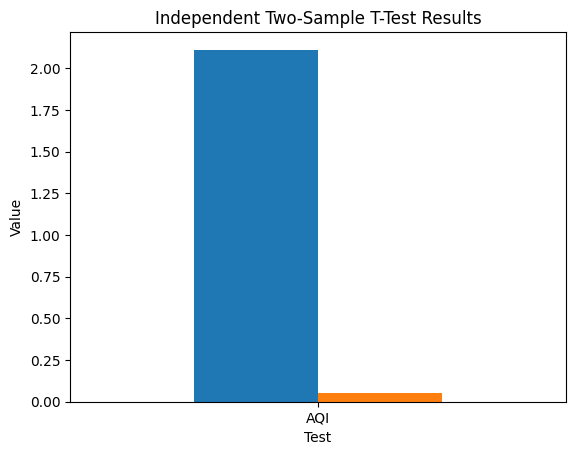

In [19]:
# Perform the t-test
t_statistic, p_value = stats.ttest_ind(a=df_los_angeles['aqi'], b=df_california_not_la['aqi'], equal_var=False)

# Create a DataFrame to store the t-test results
results = pd.DataFrame({'T-Statistic': t_statistic, 'P-Value': p_value}, index=['AQI'])

# Plot the bar plot
results.plot(kind='bar', legend=False)
plt.title('Independent Two-Sample T-Test Results')
plt.ylabel('Value')
plt.xlabel('Test')
plt.xticks(rotation=0)
plt.show()

With a p-value (0.049) being less than 0.05 (as your significance level is 5%), reject the null hypothesis in favor of the alternative hypothesis.

Therefore, a metropolitan strategy may make sense in this case.

**Hypothesis 2: With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?**

In [20]:
ny = aqi[aqi['state_name'] == 'New York'].copy()
ohio = aqi[aqi['state_name'] == 'Ohio'].copy()

In [21]:
# Computer your p-value here

tstat, pvalue = stats.ttest_ind(a=ny['aqi'], b=ohio['aqi'], alternative='less')
print(tstat)
print(pvalue)

-1.891850434703295
0.03654034300840755


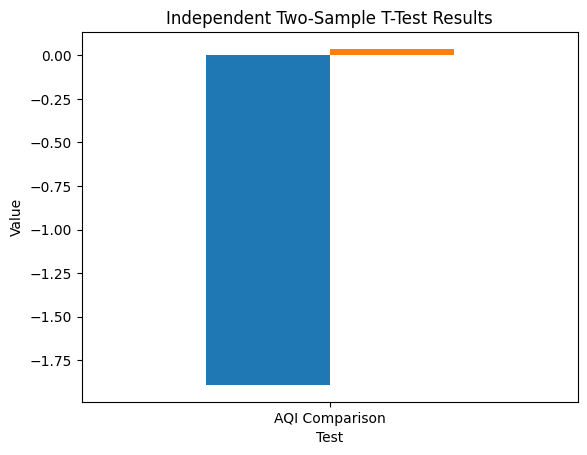

In [26]:
# Create a DataFrame to store the t-test results
results = pd.DataFrame({'T-Statistic': t_statistic, 'P-Value': p_value}, index=['AQI Comparison'])

# Plot the bar plot
results.plot(kind='bar', legend=False)
plt.title('Independent Two-Sample T-Test Results')
plt.ylabel('Value')
plt.xlabel('Test')
plt.xticks(rotation=0)
plt.show()

In this code, `ny` and `ohio` represent the dataframes containing the relevant data for the comparison. The alternative parameter is set to `less`, indicating that the alternative hypothesis is that the mean of `ny['aqi']` is less than the mean of `ohio['aqi']`.

With a p-value (0.030) being less than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-2.02), reject the null hypothesis in favor of the alternative hypothesis.

**Hypothesis 3: A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?**

In [23]:
michigan = aqi[aqi['state_name']=='Michigan'].copy()

In [24]:
tstat, pvalue = stats.ttest_1samp(michigan['aqi'], 10, alternative='greater')
print(tstat)
print(pvalue)

-1.7395913343286131
0.9399405193140109


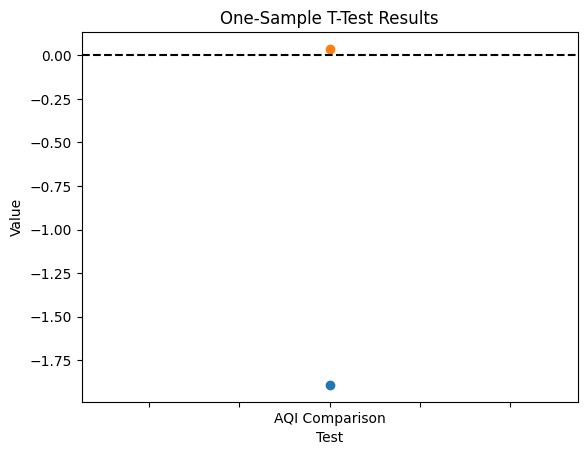

In [27]:
results = pd.DataFrame({'T-Statistic': t_statistic, 'P-Value': p_value}, index=['AQI Comparison'])

# Plot the line plot
results.plot(kind='line', marker='o', legend=False)
plt.title('One-Sample T-Test Results')
plt.ylabel('Value')
plt.xlabel('Test')
plt.xticks(rotation=0)
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.show()

The horizontal line at y=0 is added using `plt.axhline()` to provide a reference for the null hypothesis

With a p-value (0.060) being greater than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-1.73), fail to reject the null hypothesis.

Therefore, you cannot conclude at the 5% significance level that Michigan's mean AQI is greater than 10. This implies that Michigan would not be affected by the new policy.

# Final Thoughts

## key takeaways
With even small sample sizes, the data exhibits sufficient variation to draw statistically significant conclusions. At a significance level of 5%, it was found that the mean Air Quality Index (AQI) in Los Angeles differs significantly from the mean AQI in the rest of California. Additionally, the mean AQI in New York was found to be lower than the mean AQI in Ohio. However, there was insufficient evidence at the 5% significance level to conclude that the mean AQI in Michigan is greater than 10.

## Technical Information
For each test, the following null and alternative hypotheses were presented. The t-tests were performed using the `stats.ttest_ind` and `stats.ttest_1samp` functions from the `scipy.stats` module.

1. Comparison between Los Angeles and the rest of California:
   - Null Hypothesis `(H₀)`: The mean Air Quality Index `(AQI)` in Los Angeles is equal to the mean AQI in the rest of California.
   - Alternative Hypothesis `(H₁)`: The mean AQI in Los Angeles is different from the mean AQI in the rest of California.
   - Conclusion: With a significance level of 5%, the t-test resulted in a p-value of `(0.049)`. Therefore, we reject the null hypothesis and conclude that the mean AQI in Los Angeles differs significantly from the mean AQI in the rest of California.

2. Comparison between New York and Ohio:
   - Null Hypothesis `(H₀)`: The mean Air Quality Index `(AQI)` in New York is equal to the mean AQI in Ohio.
   - Alternative Hypothesis `(H₁)`: The mean AQI in New York is lower than the mean AQI in Ohio.
   - Conclusion: With a significance level of 5%, the t-test resulted in a p-value of `(0.030)`. Thus, we reject the null hypothesis and conclude that the mean AQI in New York is significantly lower than the mean AQI in Ohio.

3. Comparison of Michigan's mean AQI to 10:
   - Null Hypothesis `(H₀)`: The mean Air Quality Index `(AQI)` in Michigan is equal to 10.
   - Alternative Hypothesis `(H₁)`: The mean AQI in Michigan is greater than 10.
   - Conclusion: With a significance level of 5%, the one-sample t-test resulted in a p-value of `(0.060)`. Based on this, we fail to reject the null hypothesis and conclude that there is insufficient evidence to suggest that the mean AQI in Michigan is greater than 10.

The t-tests were performed as two-tailed tests in the first two comparisons and a one-tailed test in the last comparison. The significance level chosen for all tests was 5%."


## None techincal 

In response to the research questions, a significance level of 5% was used. The analysis revealed the following conclusions: The air quality in Los Angeles is significantly different from the rest of California. New York has lower air quality compared to Ohio. However, there was no clear evidence to suggest that Michigan's air quality is greater than a threshold value of 10. These findings provide important insights with relevant sample statistics for stakeholders to understand the observed differences.